In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import os
parentDirectory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

In [22]:
df = pd.read_csv(os.path.join(parentDirectory, 'data', 'train.csv'))#,delimiter=';',header=None)

In [23]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [24]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [25]:
df.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [26]:
dfsel=df[['PdDistrict','DayOfWeek','X','Y','Category']]

In [27]:
dfsel.dropna()

,PdDistrict,DayOfWeek,X,Y,Category
0,NORTHERN,Wednesday,-122.425892,37.774599,WARRANTS
1,NORTHERN,Wednesday,-122.425892,37.774599,OTHER OFFENSES
2,NORTHERN,Wednesday,-122.424363,37.800414,OTHER OFFENSES
3,NORTHERN,Wednesday,-122.426995,37.800873,LARCENY/THEFT
4,PARK,Wednesday,-122.438738,37.771541,LARCENY/THEFT
...,...,...,...,...,...
878044,TARAVAL,Monday,-122.459033,37.714056,ROBBERY
878045,INGLESIDE,Monday,-122.447364,37.731948,LARCENY/THEFT
878046,SOUTHERN,Monday,-122.403390,37.780266,LARCENY/THEFT
878047,SOUTHERN,Monday,-122.390531,37.780607,VANDALISM


In [28]:
for i in ['PdDistrict','DayOfWeek','Category']:
    dfsel[i] = pd.factorize(dfsel[i])[0].astype(np.uint16)

<ipython-input-28-349a727cb2de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsel[i] = pd.factorize(dfsel[i])[0].astype(np.uint16)


array([[<AxesSubplot:title={'center':'Category'}>]], dtype=object)

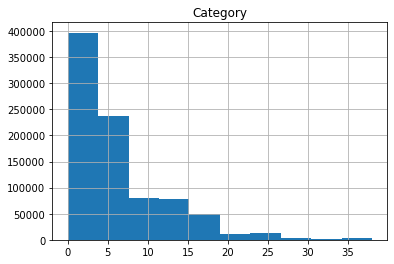

In [29]:
dfsel.hist(column='Category')

In [30]:
dfsel=dfsel[dfsel['Category']<4].sample(frac=0.4, random_state=1)

In [31]:
dfsel

,PdDistrict,DayOfWeek,X,Y,Category
434320,9,0,-122.408518,37.773760,2
7715,0,5,-122.424437,37.775740,2
604983,0,2,-122.426964,37.788327,3
151394,8,1,-122.438811,37.753827,2
280733,2,5,-122.452569,37.708489,1
...,...,...,...,...,...
361924,2,0,-122.403663,37.712696,2
296393,6,0,-122.467123,37.760263,0
127279,6,0,-122.476490,37.753286,1
714250,9,2,-122.408163,37.780535,0


In [32]:
dfsel.to_csv(os.path.join(parentDirectory, 'data', 'train_clean.csv'))

In [33]:
by=dfsel[['Category']].copy()
bX=dfsel.drop(columns=['Category'])

In [34]:
by

,Category
434320,2
7715,2
604983,3
151394,2
280733,1
...,...
361924,2
296393,0
127279,1
714250,0


In [35]:
bX

,PdDistrict,DayOfWeek,X,Y
434320,9,0,-122.408518,37.773760
7715,0,5,-122.424437,37.775740
604983,0,2,-122.426964,37.788327
151394,8,1,-122.438811,37.753827
280733,2,5,-122.452569,37.708489
...,...,...,...,...
361924,2,0,-122.403663,37.712696
296393,6,0,-122.467123,37.760263
127279,6,0,-122.476490,37.753286
714250,9,2,-122.408163,37.780535


In [36]:
bclf = LogisticRegression()
bclf.fit(bX, by)#,solver='newton-cg' ,solver='liblinear' random_state=0, 
print(bclf.score(bX, by))

C:\Users\kumaran\envs\env1\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.44009670656232097


C:\Users\kumaran\envs\env1\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#fit model
neigh.fit(bX, by)
print(neigh.score(bX, by))

<ipython-input-37-d174efb23c76>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(bX, by)


0.6250165270003967


In [38]:
import pickle
pickle.dump(neigh, open("knnmod1.dat", 'wb'))

In [ ]:
for i in range(len(mlst)):

    print('-'*20+"kernel "+str(i)+":"+krn[i]+'-'*20)
    
    neigh = mlst[i]
    print("_"*20,type(neigh).__name__,"_"*20)
    neigh.fit(bX, by)
    print(neigh.score(bX, by))

--------------------kernel 0:linear--------------------
____________________ SVR ____________________


C:\Users\kumaran\envs\env1\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
from sklearn import svm
mlst=[]
krn=[ "linear", "poly"]#kernels
for j in krn:
    mlst.append(svm.SVR(kernel=j))#new model append with kernel
